In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sys
import os
import random
from pathlib import Path

sys.path.append(str(Path().resolve().parent))
from pipeline.utils import get_polarization_mask, quick_bilinear_interpolation, get_fusion_weight, reconstruct_polarized_images, convert_to_uint8

In [2]:
input_path = '../../input'
dataset_subdirs = [name for name in os.listdir(input_path)]
img_file_name = random.choice(dataset_subdirs)
print(f'Imagen selecionada: {img_file_name}')

Imagen selecionada: screen.png


(1024, 1024, 3)


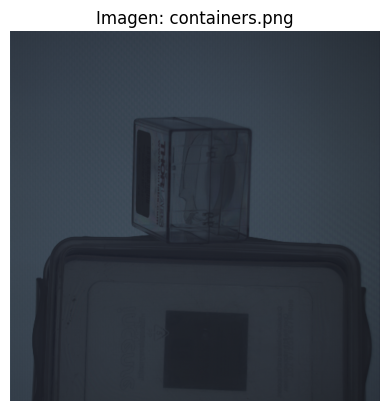

In [3]:
img_file_name = 'containers.png'
I_PFA = cv2.cvtColor(cv2.imread(f'{input_path}/{img_file_name}'), cv2.COLOR_BGR2RGB)
print(I_PFA.shape)
plt.imshow(I_PFA)
plt.title(f'Imagen: {img_file_name}')
plt.axis('off');

In [4]:
I_PFA_shape = I_PFA.shape
M_0 = get_polarization_mask(I_PFA_shape, 0)
print(M_0.shape)

(1024, 1024, 3)


I_0_hat.shape=(1024, 1024, 3)


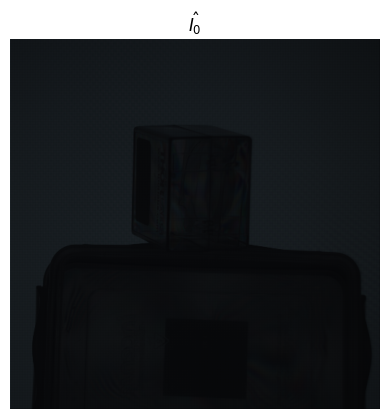

In [5]:
I_0_hat = I_PFA * M_0
print(f'{I_0_hat.shape=}')
plt.imshow(convert_to_uint8(I_0_hat), cmap='gray')
plt.title(r'$\hat{I_0}$')
plt.axis('off');

I_0_tilde.shape=(1024, 1024, 3)


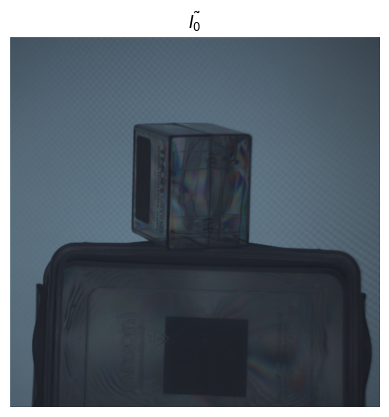

In [6]:
I_0_tilde = quick_bilinear_interpolation(I_0_hat)
print(f'{I_0_tilde.shape=}')
plt.imshow(convert_to_uint8(I_0_tilde), cmap='gray')
plt.title(r'$\tilde{I_0}$')
plt.axis('off');

In [7]:
I_0, I_45, I_90, I_135 = reconstruct_polarized_images(I_PFA)

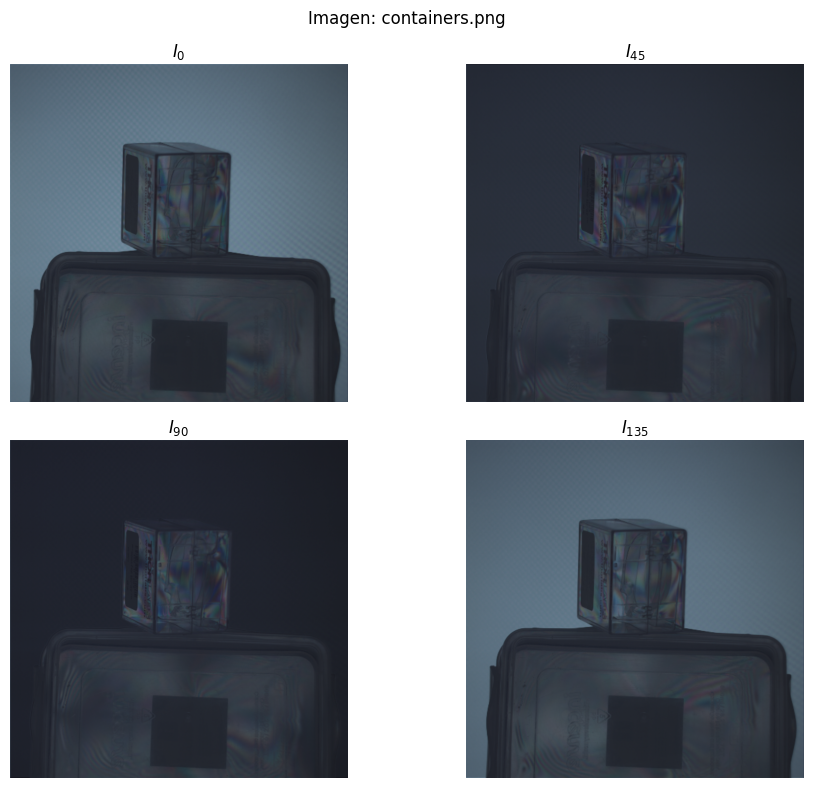

In [8]:
images = [I_0, I_45, I_90, I_135]
titles = [r'$I_0$', r'$I_{45}$', r'$I_{90}$', r'$I_{135}$']

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten() # facilita la iteración
plt.suptitle(f'Imagen: {img_file_name}')

for i, ax in enumerate(axes):
    ax.imshow(convert_to_uint8(images[i]))
    ax.set_title(f'{titles[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [9]:
I_0.shape

(2048, 2048, 3)